Final Project - Analyzing Sales Data

In [1]:
# import data
import pandas as pd
df = pd.read_csv("sample-store.csv")

In [2]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# shape of dataframe
df.shape
(9994, 21)

(9994, 21)

In [4]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [6]:
# TODO - convert order date and ship date to datetime in the original dataframe
df["Order Date"] = pd.to_datetime(df["Order Date"], format = "%m/%d/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format = "%m/%d/%Y")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
# TODO - count nan in postal code column
df['Postal Code'].isna().sum()

11

In [8]:
# TODO - filter rows with missing values
df[df['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


In [9]:
# TODO - Explore this dataset on your owns, ask your own questions
result = df[['Ship Mode','Segment']].value_counts().reset_index()
result.columns = [['Ship Mode','Segment','Count']]
result

,Ship Mode,Segment,Count
0,Standard Class,Consumer,3085
1,Standard Class,Corporate,1812
2,Standard Class,Home Office,1071
3,Second Class,Consumer,1020
4,First Class,Consumer,769
5,Second Class,Corporate,609
6,First Class,Corporate,485
7,Same Day,Consumer,317
8,Second Class,Home Office,316
9,First Class,Home Office,284


Data Analysis Part
Answer 10 below questions to get credit from this course. Write pandas code to find answers.

In [11]:
# TODO 01 - how many columns, rows in this dataset
rows,columns = df.shape
print(f"there are {rows} row")
print(f"there are {columns} columns")

there are 9994 row
there are 21 columns


In [12]:
# TODO 02 - is there any missing values?, if there is, which colunm? how many nan values?
df.isna().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [13]:
# TODO 03 - your friend ask for `California` data, filter it and export csv for him
California_data = df[df['State'] == 'California']
California_data.to_csv("California_data.csv")


In [14]:
# TODO 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file
## df.query('State == "California" | State == "Texas"')

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
Calofornia_Taxas = df.query('State == "California" | State == "Texas"')
Calofornia_Taxas_2017 = Calofornia_Taxas[Calofornia_Taxas['Order Date'].dt.year == 2017]
Calofornia_Taxas_2017.to_csv("Calofornia_Taxas_2017.csv")


In [15]:
# TODO 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017
orders_2017 = df[df['Order Date'].dt.year == 2017]
sales_2017 = df[df['Order Date'].dt.year == 2017].agg(['sum','mean','std'])
sales_2017['Sales']

<ipython-input-15-b57321f249fb>:3: FutureWarning: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sales_2017 = df[df['Order Date'].dt.year == 2017].agg(['sum','mean','std'])


sum     484247.498100
mean       242.974159
std        754.053357
Name: Sales, dtype: float64

In [16]:
# TODO 06 - which Segment has the highest profit in 2018
orders_2018 = df[df['Order Date'].dt.year == 2018]
segment_profit_2018 = orders_2018.groupby('Segment')['Profit'].sum()
segment_profit_2018

Segment
Consumer       28460.1665
Corporate      20688.3248
Home Office    12470.1124
Name: Profit, dtype: float64

In [17]:
# TODO 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019
sale_by_segment = df[(df['Order Date'] > '2019-4-15') & (df['Order Date'] < '2019-12-31')].groupby('State')['Sales'].sum()
top5_least_sale = sale_by_segment.sort_values().head(5)
top5_least_sale

State
New Hampshire            49.05
New Mexico               64.08
District of Columbia    117.07
Louisiana               249.80
South Carolina          502.48
Name: Sales, dtype: float64

In [18]:
# TODO 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25%
orders_2019 = df[df['Order Date'].dt.year == 2019]
total_sales_2019 = orders_2019['Sales'].sum()

total_sales_wc_2019 = orders_2019.query('Region == "West" | Region == "Central"')['Sales'].sum()
portion_wc = ((total_sales_wc_2019/total_sales_2019)*100).round(decimals=2)
print(f"{portion_wc} %")

54.97 %


In [19]:
# TODO 09 - find top 10 popular products in terms of number of orders vs. total sales during 2019-2020
orders_2019_2020 = df[(df['Order Date'] >= '2019') & (df['Order Date'] < '2021')]

top10_pop_product = orders_2019_2020\
    .groupby('Product Name')\
    .sum()\
    .sort_values('Quantity',ascending= False)\
    .head(10)[['Quantity','Sales']]\
    .round(decimals=2)

top10_pop_product

<ipython-input-19-2ee63d4fd7ba>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()\


,Quantity,Sales
Product Name,,
Staples,124,462.07
Easy-staple paper,89,1481.73
Staple envelope,73,644.94
Staples in misc. colors,60,357.16
Chromcraft Round Conference Tables,59,7965.05
Storex Dura Pro Binders,49,176.42
"Situations Contoured Folding Chairs, 4/Set",47,2612.06
"Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear",44,178.06
Avery Non-Stick Binders,43,122.13


In [20]:
# TODO 10 - plot at least 2 plots, any plot you think interesting :)
orders_2019_2020

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
12,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
13,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605.0,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


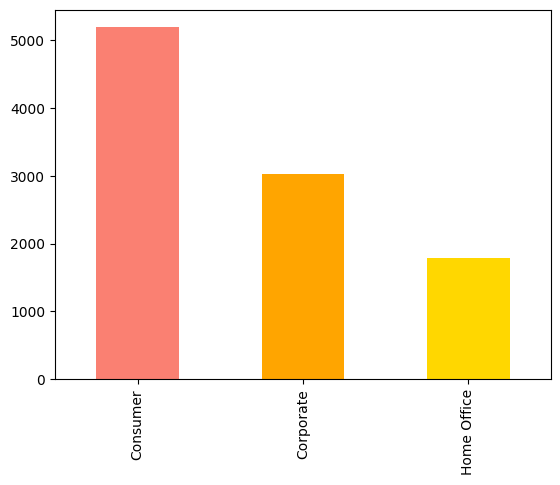

In [21]:
# Chart number order by segment

df['Segment'].value_counts().plot(kind = 'bar', color = ['salmon','orange','gold']);

In [22]:
# TODO Bonus - use np.where() to create new column in dataframe to help you answer your own questions

import numpy as np

df['Pass/NotPass'] = np.where(df['Profit'] > 0 , "Pass", "NotPass")

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Pass/NotPass
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Pass
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Pass
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Pass
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NotPass
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,Pass
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,Pass
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,Pass
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,Pass
